# Lab 3

In [2]:
# 1. Defines a function that produces a numerical aproximation of a nuclear decay.

from pylab import exp

def populationNumerical(Ni, r, time):
    """ Accepts an initial value of nuclei, a lambda value, and a time array, and returns an array with a numerical
    approximation of the amount of nucleiat each time in the time array.
    
    The arguements are the initial number of nuclei, the lambda value, and the time of decay.
    
    The result is the numerical approximation of the number of nuclei at the given time."""
    
    ti = 0
    N = [Ni] # The first value in the N array is the initial number of nuclei
    
    for instant in range(len(time)):
        t = (instant * max(time)) / len(time) # Calculates the time based on where we are in the loop
        delta_t = t-ti
        N.append(N[instant]+(-r*N[instant])*(delta_t)) # Uses Euler's formula to calculate the number of nuclei at the next time
        ti = t # Resets Ti to the next time value
        
    N.pop() # Removes the last value in the N array so that it's the same size as the time array.
    
    return N

In [3]:
# 2. Defines a function that an exact nuclear decay.

def populationExact(Ni, r, time):
    """ Accepts an initial value of nuclei, a lambda value, and a time array, and returns an array with the exact
    amount of nuclei at each time in the time array.
    
    The arguements are the initial value of nuclei, the lambda value, and the time of decay. 
    
    The result is the exact final number if nucei."""
    
    N = Ni * exp(-time*r) # Calculates N at time t using the exponetial decay method
    
    return N

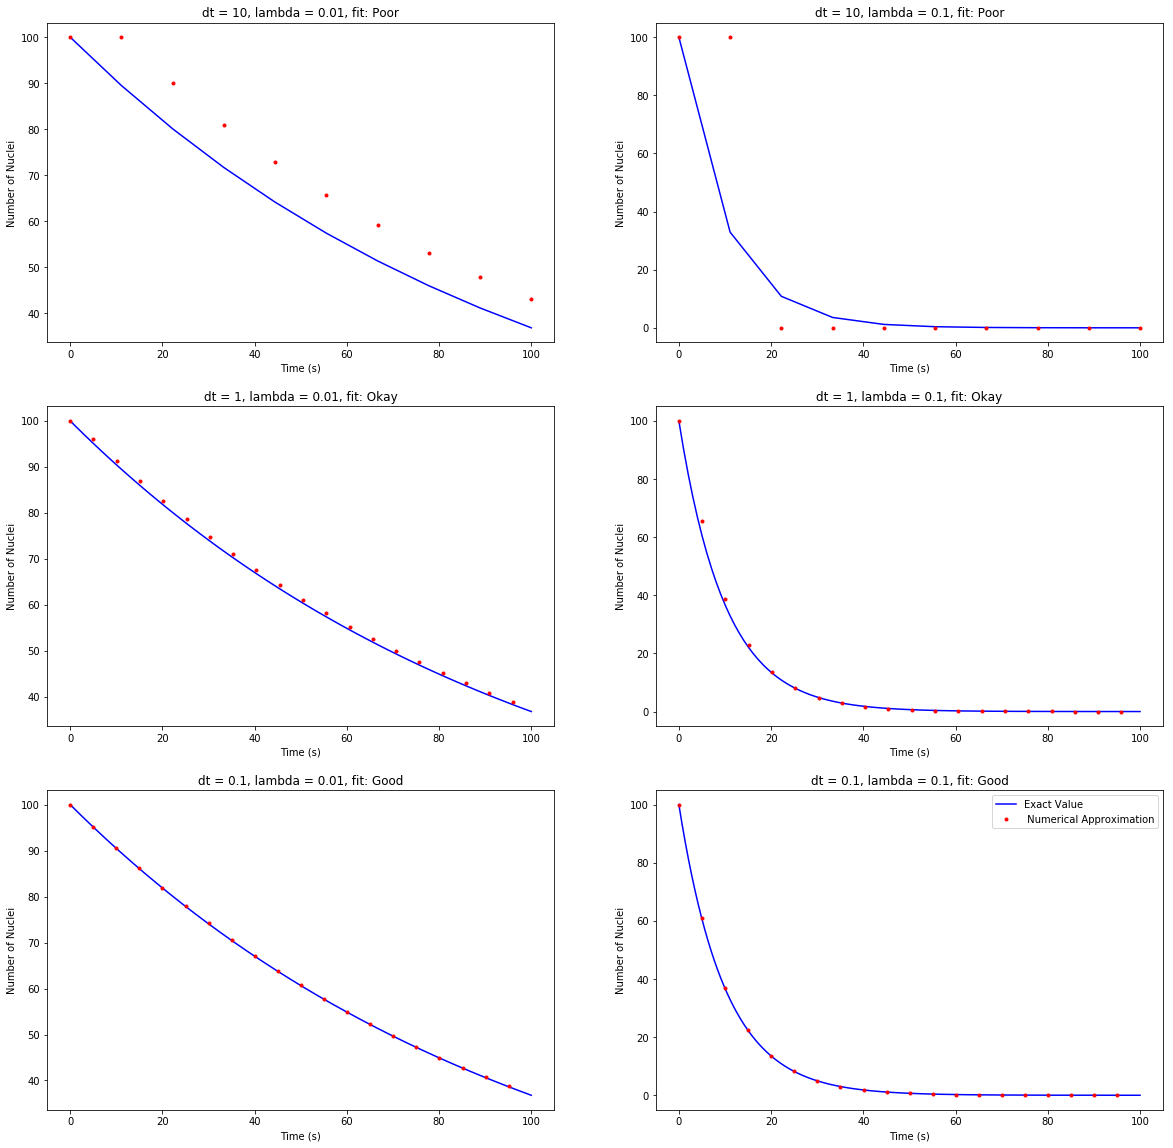

In [55]:
# Plots the same decay using the two different methods on the same plot.

%matplotlib inline
from pylab import plot, show, xlabel, ylabel, legend, title, subplot, figure
from numpy import linspace
figure(figsize = (20,20)) # Makes plots large enough to see

# CORRECTION: I previously only plotted one version of the putput, so I added more cases, and titels.

# Case 1: dt = 10, lambda = 0.01
Ni = 100.0                        #initialize number of nuclei
r = 0.01                          #set decay constant
deltat = 10                        #sets the timestep
totalTime = 100                   #sets the length of the decay
timeSteps = int(totalTime/deltat) #calcualtes how many timesteps are needed in the time array
time = linspace(0,totalTime,timeSteps)
ax = subplot(321)
populationMap = populationNumerical(Ni,r,time)  # Creates a map of N values using the numerical approximation function
populationAnalytic = populationExact(Ni,r,time) # Creates a plot of N values using the exact exponential decay function
# Plots both plots on the same graph so that the map is represented with dots and the exact value is represented
# with a solid line.
plot(time,populationAnalytic, "b", label = "Exact Value")
plot(time,populationMap, "r.", markevery = 1, label = " Numerical Approximation")
xlabel("Time (s)")
ylabel("Number of Nuclei")
title("dt = 10, lambda = 0.01, fit: Poor")

# Case 2: dt = 1, lambda = 0.1
r = 0.1                           #change lambda for current case
deltat = 10                       #change dt for current case                   
timeSteps = int(totalTime/deltat) 
time = linspace(0,totalTime,timeSteps)
ax = subplot(322)
populationMap = populationNumerical(Ni,r,time)
populationAnalytic = populationExact(Ni,r,time)
plot(time,populationAnalytic, "b", label = "Exact Value")
plot(time,populationMap, "r.", markevery = 1, label = " Numerical Approximation")
xlabel("Time (s)")
ylabel("Number of Nuclei")
title("dt = 10, lambda = 0.1, fit: Poor")

# Case 3: dt = 1, lambda = 0.01
r = 0.01                           #change lambda for current case
deltat = 1                         #change dt for current case 
timeSteps = int(totalTime/deltat)
time = linspace(0,totalTime,timeSteps)
ax = subplot(323)
populationMap = populationNumerical(Ni,r,time)
populationAnalytic = populationExact(Ni,r,time)
plot(time,populationAnalytic, "b", label = "Exact Value")
plot(time,populationMap, "r.", markevery = 5, label = " Numerical Approximation")
xlabel("Time (s)")
ylabel("Number of Nuclei")
title("dt = 1, lambda = 0.01, fit: Okay")

# Case 4: dt = 1, lambda = 0.1
r = 0.1                           #change lambda for current case
deltat = 1                        #change dt for current case 
timeSteps = int(totalTime/deltat)
time = linspace(0,totalTime,timeSteps)
ax = subplot(324)
populationMap = populationNumerical(Ni,r,time)
populationAnalytic = populationExact(Ni,r,time)
plot(time,populationAnalytic, "b", label = "Exact Value")
plot(time,populationMap, "r.", markevery = 5, label = " Numerical Approximation")
xlabel("Time (s)")
ylabel("Number of Nuclei")
title("dt = 1, lambda = 0.1, fit: Okay")

# Case 5: dt = 0.1, lambda = 0.01
r = 0.01                           #change lambda for current case
deltat = 0.1                       #change dt for current case 
timeSteps = int(totalTime/deltat)
time = linspace(0,totalTime,timeSteps)
ax = subplot(325)
populationMap = populationNumerical(Ni,r,time)
populationAnalytic = populationExact(Ni,r,time)
plot(time,populationAnalytic, "b", label = "Exact Value")
plot(time,populationMap, "r.", markevery = 50, label = " Numerical Approximation")
xlabel("Time (s)")
ylabel("Number of Nuclei")
title("dt = 0.1, lambda = 0.01, fit: Good")

# Case 6: dt = 0.1, lambda = 0.1
r = 0.1                           #change lambda for current case
deltat = 0.1                      #change dt for current case 
timeSteps = int(totalTime/deltat)
time = linspace(0,totalTime,timeSteps)
ax = subplot(326)
populationMap = populationNumerical(Ni,r,time)
populationAnalytic = populationExact(Ni,r,time)
plot(time,populationAnalytic, "b", label = "Exact Value")
plot(time,populationMap, "r.", markevery = 50, label = " Numerical Approximation")
xlabel("Time (s)")
ylabel("Number of Nuclei")
title("dt = 0.1, lambda = 0.1, fit: Good")

#END CORRECTION

legend(loc = "best")
show()

These graphs represente a nuclear decay calculated with both an exact calcualtion, and a numerical approximation of the number of nuclei at a given time. The numerical approximation is a map generated using the Euler method. In each sublot the timestep and the lambda value are varied. From this, we can see that the fit is more accurate when delta t, the distance between each value in the time array, is smaller, and less accurate when delta t is larger. This is interetsing because it shows that we can approximate a nucelar decay very accurately using the Euler method as long as delta t is small enough. The model that fits this data is an exponential decay. This is what we expect, because radioactive nuclei decay exponentially. 

In [41]:
# 5. Defines a function that calculates the number of B nuclei, where the decay of A nuclei is already deifned, and 
# A nuclei decay into B nuclei.

def coupled(NA, NBi, rA, rB, time):
    """ Accepts an array of population A at various times, the initial value of the B population, 
    a lambda value for each popualation, and a time array, and returns an array of B population values at each time in the 
    time array. 
    
    The arguements are the number of A nuclei at the given time, the initial number of B nuclei, the A lambda value, 
    the B lambda value, and the time of decay. 
    
    The result is the approximate final number if B nucei"""
    
    ti = 0
    NB = [NBi] # The first value in the NB array is the initial number of B nuclei
    
    for instant in range(len(time)):
        t = (instant * max(time)) / len(time) # Calculates the time based on where we are in the loop
        delta_t = t-ti
        # Uses Euler's formula to calculate the number of B nuclei at the next time. This takes into account the nuclei that are
        # added to B from A, and the nuclei that are decaying from B
        NB.append(NB[instant] + (rA*NA[instant] - rB*NB[instant]) * (delta_t))
        ti = t # Resets Ti to the next time value
        
    NB.pop() # Removes the last value in the N array so that it's the same size as the time array.
    
    return NB

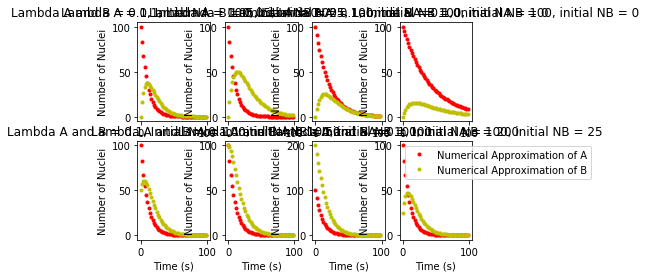

In [47]:
# CORRECTION: I changed the code so that all plots are subgraphs of the same figure, and I added more cases.

# Case 1: Lambda A and B = 0.1, Initial NA = 100, initial NB = 0
# Plots the numerical approximation of the decay of both A and B nuclei on the same plot. The rest of the graphs represent
# different test cases with their variables in the title.
ax = subplot(241)
populationA = populationNumerical(100,0.1,time)
populationB = coupled(populationA, 0, 0.1, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Lambda A and B = 0.1, Initial NA = 100, initial NB = 0")
xlabel("Time (s)")
ylabel("Number of Nuclei")

# Case 2: Lambda A = 0.1, Labmda B = 0.05, Initial NA = 100, initial NB = 0
ax = subplot(242)
populationA = populationNumerical(100,0.1,time)
populationB = coupled(populationA, 0, 0.1, 0.05, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Lambda A = 0.1, Labmda B = 0.05, Initial NA = 100, initial NB = 0")
xlabel("Time (s)")
ylabel("Number of Nuclei")

# Case 3: Lambda A = 0.05, Labmda B = 0.1, Initial NA = 100, initial NB = 0
ax = subplot(243)
populationA = populationNumerical(100,0.05,time)
populationB = coupled(populationA, 0, 0.05, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Lambda A = 0.05, Labmda B = 0.1, Initial NA = 100, initial NB = 0")
xlabel("Time (s)")
ylabel("Number of Nuclei")

# Case 4: Lambda A = 0.025, Labmda B = 0.1, Initial NA = 100, initial NB = 0
ax = subplot(244)
populationA = populationNumerical(100,0.025,time)
populationB = coupled(populationA, 0, 0.025, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Lambda A = 0.025, Labmda B = 0.1, Initial NA = 100, initial NB = 0")
xlabel("Time (s)")
ylabel("Number of Nuclei")

# Case 5: Lambda A and B = 0.1, Initial NA = 100, initial NB = 50
ax = subplot(245)
populationA = populationNumerical(100,0.1,time)
populationB = coupled(populationA, 50, 0.1, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Lambda A and B = 0.1, Initial NA = 100, initial NB = 50")
xlabel("Time (s)")
ylabel("Number of Nuclei")

# Case 6: Lambda A and B = 0.1, Initial NA = 100, initial NB = 100
ax = subplot(246)
populationA = populationNumerical(100,0.1,time)
populationB = coupled(populationA, 100, 0.1, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Lambda A and B = 0.1, Initial NA = 100, initial NB = 100")
xlabel("Time (s)")
ylabel("Number of Nuclei")

# Case 7: Lambda A and B = 0.1, Initial NA = 100, initial NB = 200
ax = subplot(247)
populationA = populationNumerical(100,0.1,time)
populationB = coupled(populationA, 200, 0.1, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Lambda A and B = 0.1, Initial NA = 100, initial NB = 200")
xlabel("Time (s)")
ylabel("Number of Nuclei")

# Case 8: Lambda A and B = 0.1, Initial NA = 100, initial NB = 25
ax = subplot(248)
populationA = populationNumerical(100,0.1,time)
populationB = coupled(populationA, 25, 0.1, 0.1, time)
plot(time,populationA,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationB,"y.",markevery = 20, label = "Numerical Approximation of B")
title("Lambda A and B = 0.1, Initial NA = 100, initial NB = 25")
xlabel("Time (s)")
ylabel("Number of Nuclei")


legend(loc = "best")
show()

These plots show the nuclear decay of two types of nuclei, A and B, where A turns into B when it decays. The red dots show the decay of popultion A, which follows the same pattern as the previous plot. The yellow dots represent the decay of population B, which increases initially due to the A nuclei that are decaying into B nuclei, and then decreses, since population B is radioactive as well. This is interesting because it shows us how a coupled system of nuclei decays over time. Population A follows an expenential decay pattern as before, and the model that fits population B is that of one nuclear decay subtraced by another. This is what we expect, because the nuclei from population A are being added to B in a negative expoential decay, and B is itself decaying exponentially.

The top row of plots shows how the decay varies depending on the labmda values of populatsions A and B. From these. we can se that when A has a smaller lambda value, the A nuclei decay slower, causing the B nuclei to have a slower initial increase. And when B has a small enough lambda value, the number of B nuclei never exceeds the number of A nuclei.

The bottom row shows how decay varies depeding on the initial value of population B. From this, we can see that as the initial number of B nuclei increases compared to the initial number of A nuclei, the initial curvature of the B plot begins to become less noticable. ALso when the two populations have the same initial size, we can see that it takes population B longer to decay than population A.

In [ ]:
# END CORRECTION

In [30]:
# This defines a function of the exact NB values for the decay of population B.

from numpy import exp

def coupledExact(NAi, NBi, rA, rB, time):
    """ Accepts an array of population A at various times, the initial value of the B population, 
    a lambda value for each popualation, and a time array, and returns an array of B population values at each time in the 
    time array. 
    
    The arguements are the number of A nuclei at the given time, the initial number of B nuclei, the A lambda value, 
    the B lambda value, and the time of decay. 
    
    The result is the exact final number if B nucei"""
    
    NB = ((rA*NAi)/(rB-rA))*exp(-rA*time) + (NBi-((rA*NAi)/(rB-rA)))*exp(-rB*time)
    
    return NB

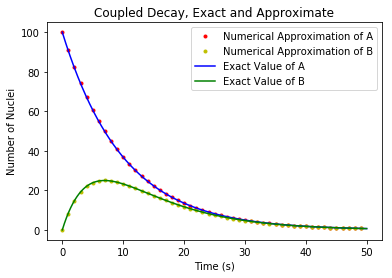

In [42]:
# This calucaltes both the approximate and exact number of nuclei for populations A and B
populationAApprox = populationNumerical(100,0.1,time)
populationBApprox = coupled(populationAApprox, 0, 0.1, 0.2, time)
populationAExact = populationExact(100,0.1,time)
populationBExact = coupledExact(100, 0, 0.1, 0.2, time)

# This plots all four plots on the same graph
plot(time,populationAApprox,"r.",markevery = 20, label = "Numerical Approximation of A")
plot(time,populationBApprox,"y.",markevery = 20, label = "Numerical Approximation of B")
plot(time,populationAExact,"b", label = "Exact Value of A")
plot(time,populationBExact,"g", label = "Exact Value of B")
title("Coupled Decay, Exact and Approximate")
xlabel("Time (s)")
ylabel("Number of Nuclei")
legend(loc = "best")
show()

This plot compares the exact and approximate values of the decay of populations A and B over time, where A decays into B. The solid lines indicate the exact values, and the dots represent the Euler approximation. Since delta t is relatively high, the fit is pretty close for both populations. This is interesting, because it shows that some very complex calcualtions, such as the one we derived to represent population B can be approximated very accurately using simpler calculations. Both representations of population A follow an exponential decay pattern, and the model that fits both representations of population B is that of one nuclear decay subtracted by another. This is what we expect, since it is the same fit that we had previously, and the equation that we calculated to represent the decay of population B included one exponetial decay subtracted by another. 

In [48]:
# CORRECTION: Fixed bad spelling above